# Chemicals in Cosmetics - Data Bootcamp Report
### Manuela Lopez Giraldo
May 12, 2017

### Report Outline:

In the United States, the FDA implements little regulation over ingredients in cosmetics. Despite the fact that the majority of products on the market containing dangerous ingredients, some of which are reported to be linked to cancer, there is no clear warning provided for the average consumer. All across the nation, consumers are slowly gaining and demanding more awareness of the ingredients that make up their cosmetics and are turning to brands that offer more natural and organic products. As consumers turn to "green" cosmetics, do the offerings by major cosmetics corporations follow suit? 


This project will serve as a report on the product offerings by major cosmetics corporations. 
This report uses data from the California Safe Cosmetics Program under the California Department of Public Health. I will cover the leading companies that offer potentially hazardous products, the products with the most hazardous ingredients, the most common chemicals included in cosmetics, as well as the trend of cosmetics products with hazardous chemicals over time.

#### Importing Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib as mpl
import sys

In [3]:
url = 'https://chhs.data.ca.gov/api/views/7kri-yb7t/rows.csv?accessType=DOWNLOAD'
CosmeticsData = pd.read_csv(url)
CosmeticsData.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,24969,CoverGirl Outlast Illumina All Day Lipcolor,38098.0,Luminous Lilac,86,The Procter & Gamble Company,CoverGirl,44,Makeup Products (non-permanent),53,...,13463-67-7,38700,Titanium dioxide,01/07/2015 12:00:00 AM,01/07/2015 12:00:00 AM,NaN,01/07/2015 12:00:00 AM,01/07/2015 12:00:00 AM,NaN,1
1,960,Liner Shadow,45015.0,Bark,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),48,...,13463-67-7,1047,Titanium dioxide,09/15/2009 12:00:00 AM,09/02/2016 12:00:00 AM,NaN,09/15/2009 12:00:00 AM,09/02/2016 12:00:00 AM,NaN,1
2,25882,Lip Gloss (FLAB-0048),NaN,NaN,1000,MAESA LLC,Candies,44,Makeup Products (non-permanent),53,...,NaN,40424,"Mineral oils, untreated and mildly treated",04/01/2015 12:00:00 AM,11/02/2015 12:00:00 AM,04/01/2015 12:00:00 AM,04/01/2015 12:00:00 AM,04/01/2015 12:00:00 AM,NaN,3
3,9247,02 CONCEALER,NaN,NaN,77,"Buth-na-Bodhaige, Inc",The Body Shop,44,Makeup Products (non-permanent),50,...,13463-67-7,14193,Titanium dioxide,12/22/2009 12:00:00 AM,02/19/2014 12:00:00 AM,02/19/2014 12:00:00 AM,12/22/2009 12:00:00 AM,12/22/2009 12:00:00 AM,NaN,1
4,14404,NARS Nail Polish,37097.0,Thakoon- Kutki,352,Nars Cosmetics,NARS,59,Nail Products,65,...,13463-67-7,22059,Titanium dioxide,06/30/2010 12:00:00 AM,10/21/2016 12:00:00 AM,NaN,06/30/2010 12:00:00 AM,08/11/2014 12:00:00 AM,NaN,1


To extract exact figures for current products, it would be best to clean up the dataset. I removed several columns with unnecessary information as well as removed observations with values in both the 'DiscontinuedDate' and 'ChemicalDateRemoved' columns. This resulted in a new DataFrame with observations of cosmetic products with chemicals that are currently being sold on the market. This new DataFrame will be used for the first two objectives of the report.

In [4]:
df = CosmeticsData.drop(CosmeticsData.columns[[0, 1, 2, 3, 4, 7, 9, 11, 12, 13, 15, 16, 18, 19]], axis=1)
df = df[pd.isnull(df['ChemicalDateRemoved'])]
df = df[pd.isnull(df['DiscontinuedDate'])]

df.head()

,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
0,The Procter & Gamble Company,CoverGirl,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,NaN,NaN,1
1,"Bare Escentuals Beauty, Inc.",bareMinerals,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,NaN,NaN,1
4,Nars Cosmetics,NARS,Nail Products,Nail Polish and Enamel,Titanium dioxide,NaN,NaN,1
5,LVMH FRAGRANCE BRANDS - PARFUMS GIVENCHY,LVMH FRAGRANCE BRANDS,Makeup Products (non-permanent),Face Powders,Mica,NaN,NaN,2
6,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,NaN,NaN,1


# Part 1: Companies, Brands & Products

My first objective is to report on the companies and brands behind these cosmetics with chemicals. Using value_counts, I was able to find the companies with the most observations (greatest amount of cosmetics) that are hazardous. As there are thousands of brands included in this dataset, I chose to report on the top 20 companies with the most amount of potentially hazardous ingredients. 

In [5]:
df['CompanyName'].value_counts().head(20)

L'Oreal USA                             5732
Coty                                    4621
Bare Escentuals Beauty, Inc.            3203
NYX Los Angeles, Inc.                   3122
S+                                      2696
The Procter & Gamble Company            2460
American International Industries       1993
Nars Cosmetics                          1495
CLARINS S.A.                            1397
tarte inc.                              1371
The Boots Company PLC                   1269
Caleel+Hayden                           1197
Beauty 21 Cosmetics, Inc.               1104
Ventura International, Ltd              1053
Revlon Consumer Products Corporation     961
Hand & Nail Harmony, Inc                 959
Merle Norman Cosmetics                   867
Palladio Beauty Group                    852
Guerlain SA                              810
Buth-na-Bodhaige, Inc                    746
Name: CompanyName, dtype: int64

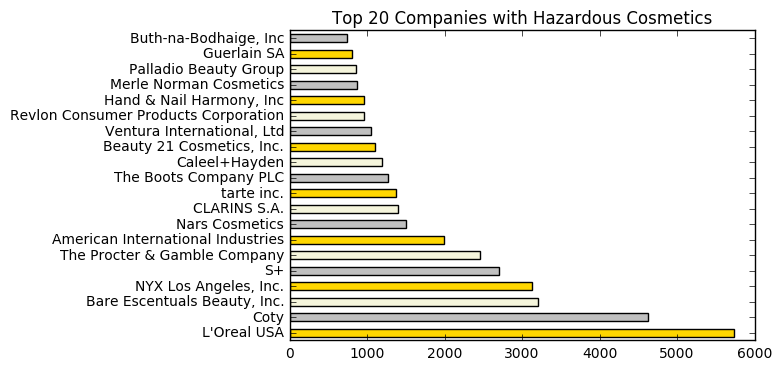

In [6]:
top20companies = df['CompanyName'].value_counts()
top20companies.head(20).plot(kind='barh',
                            title='Top 20 Companies with Hazardous Cosmetics',   
                            color=['gold', 'silver', 'beige'])

This illustrates the companies with the most reports of cosmetics products with hazardous ingredients. However, these are major companies that own many brands and subsidiaries. To demonstrate which brands the average consumer should be the most aware of, I then showed the top-ranked brands with hazardous ingredients as a part of the parent company they fall under. I took a look at L'Oreal USA and Coty, the two major cosmetics parent companies. 

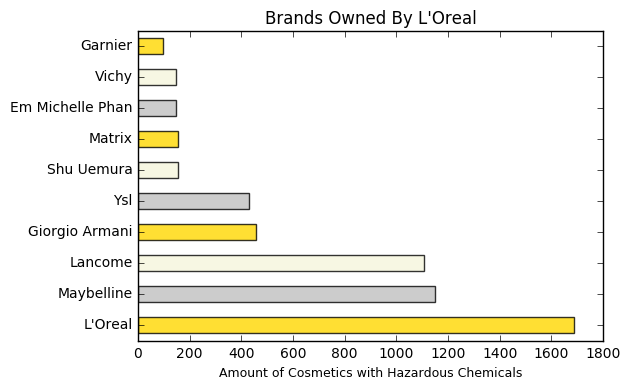

In [7]:
dff = df.set_index('CompanyName')

loreal = dff.loc[["L'Oreal USA"], ['BrandName']]

fig, ax = plt.subplots()
loreal['BrandName'].str.title().value_counts().head(10).plot(kind='barh', 
                                                             color=['gold', 'silver', 'beige'],
                                                             alpha=.8)
ax.set_xlabel('Amount of Cosmetics with Hazardous Chemicals', fontsize=9)
ax.set_title("Brands Owned By L'Oreal", fontsize=12)

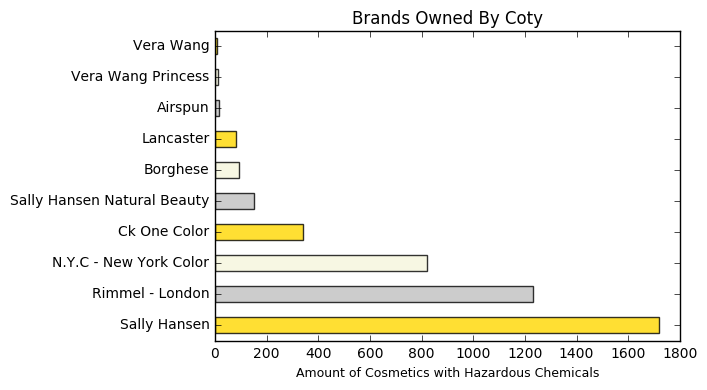

In [8]:
coty = dff.loc[["Coty"], ['BrandName']]

fig, ax = plt.subplots()
coty['BrandName'].str.title().value_counts().head(10).plot(kind='barh', 
                                                           color=['gold', 'silver', 'beige'], 
                                                           alpha=.8)
ax.set_xlabel('Amount of Cosmetics with Hazardous Chemicals', fontsize=9)
ax.set_title("Brands Owned By Coty", fontsize=12)

In [9]:
df.groupby(['CompanyName', "BrandName"]).size().nlargest(5)

CompanyName                   BrandName   
NYX Los Angeles, Inc.         NYX             3122
Bare Escentuals Beauty, Inc.  bareMinerals    2731
S+                            Sephora         1770
Coty                          Sally Hansen    1720
Nars Cosmetics                NARS            1490
dtype: int64

The first two graphs show the brands within the top two major companies, L'Oreal and Coty, that offer the highest amount of cosmetics with hazardous chemicals. However, using group_by creates a series that shows that these are not necessarily the worst brands with the highest amount of potentially hazardous cosmetics. 

The two worst brands, as suggested by L'Oreal and Coty, would be the L'Oreal brand and Sally Hansen. However, group_by shows that from all the reported observations in the dataset, NYX and bareMinerals are actually the worst offenders of all brands. 

This shows that the high number of cosmetics with hazardous chemicals that is reported for the L'Oreal and Coty companies actually reflect their massive amount of subsidiary brands more so than a pervasiveness of hazardous ingredients in their chemicals. 

After establishing which companies and brands offer the greatest range of cosmetics with potentially hazardous ingredients, I then wanted to analyze the products with these chemicals.

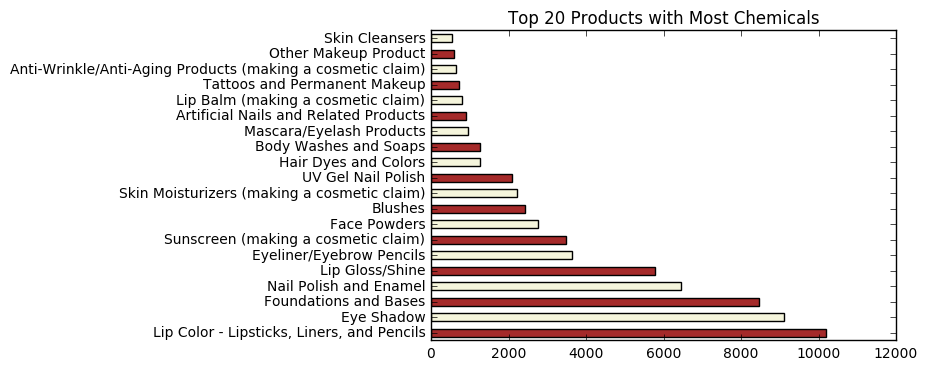

In [10]:
top20types = df['SubCategory'].value_counts()
top20types.head(20).plot(kind='barh', 
                         title='Top 20 Products with Most Chemicals', 
                         color=['brown', 'beige'])

# Part 2: Chemicals

Having already looked at which brands carried the greatest amount of cosmetics with chemicals, I then wanted to take a closer look at NYX cosmetics' chemicals compared to the most used chemicals across all reported observations.

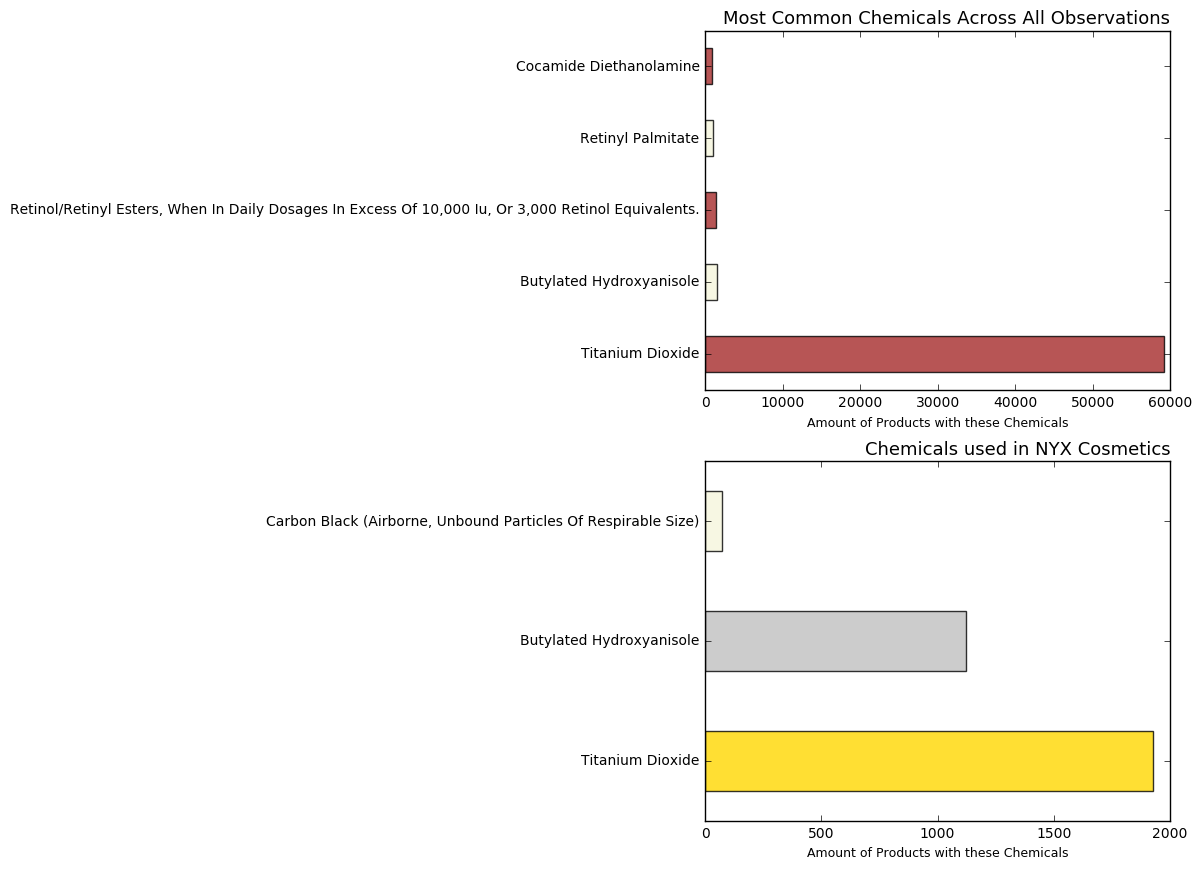

In [11]:
nyx = dff.loc[["NYX Los Angeles, Inc."], ['ChemicalName']]
fig, ax = plt.subplots(2, 1)
df['ChemicalName'].str.title().value_counts().head(5).plot(kind='barh', ax=ax[0],
                                                             color=['brown', 'beige'],
                                                             alpha=.8)
nyx['ChemicalName'].str.title().value_counts().plot(kind='barh', ax=ax[1],
                                                    color=['gold', 'silver', 'beige'],
                                                    alpha=.8)
ax[0].set_title("Most Common Chemicals Across All Observations", loc='right', fontsize=13)
ax[1].set_title("Chemicals used in NYX Cosmetics", loc='right', fontsize=13)
ax[0].set_xlabel('Amount of Products with these Chemicals', fontsize=9)
ax[1].set_xlabel('Amount of Products with these Chemicals', fontsize=9)

plt.subplots_adjust(top=2.1) 

NYX cosmetics regularly use the same three potentially hazardous ingredients in their products. Titanium Dioxide is considered to be low risk and is common in cosmetics, as seen by the subplot comparison. However, Butylated Hydroxyanisole (BHA) and Carbon Black are considered to pose a moderate hazard with possibility of being a human carcinogen by the Environmental Working Group's Cosmetics Database. NYX uses BHA in their cosmetics with much greater frequency as opposed to the entirety of the products in the market.

# Part 3: Chemical Trends in Cosmetics Products

To conclude the report, I wanted to take a look at the change in potentially hazardous ingredients in cosmetics from the beginning of these observations compared to the end. As cosmetics consumers increasingly demand more organic products, companies should show an overall decrease in the chemicals in their product range.

In [12]:
CosmeticsData.shape

(81651, 22)

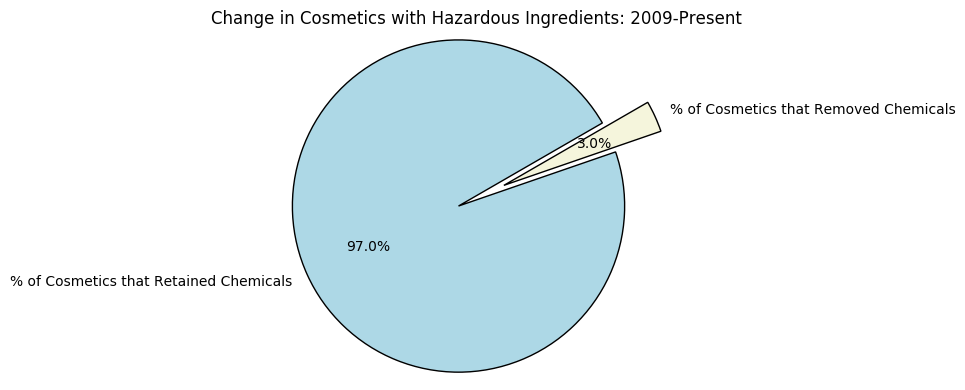

In [15]:
labels = '% of Cosmetics that Retained Chemicals', '% of Cosmetics that Removed Chemicals'
sizes = [CosmeticsData['ChemicalDateRemoved'].isnull().sum(), 
         CosmeticsData['ChemicalDateRemoved'].notnull().sum()]
colors = ['lightblue', 'beige']
explode = (0, 0.3)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=30)
plt.title('Change in Cosmetics with Hazardous Ingredients: 2009-Present')

plt.axis('equal')
plt.tight_layout()
plt.show()

This report brings a number of observations and insights that are valuable for a typical consumer of cosmetics. I first looked at which companies were behind the greatest amount of cosmetics with hazardous ingredients currently on the market. Then I took a more specific look at which brands offered the most chemical-heavy product range. Based on the findings from this report, cosmetics consumers can be more wary of health hazards posed by chemicals in cosmetics such as those in NYX's product range. Additionally, consumers can be more mindful of which types of products have the most reported observations of potentially hazardous chemicals. 

Another interesting finding of this report is the trend of chemicals in cosmetics over time. As cosmetics R&D grows, companies should be expected to rely less on traditionally used hazardous chemicals. This would also address the emerging customer demand for more natural and "green" cosmetics. However, we see this happening at a much smaller pace than expected. Of all the observations for cosmetics sold by large companies that contained potentially hazardous chemicals, only 3% of these cosmetics removed their hazardous ingredients by the present day. 